# California Watersheds

Main webpage: https://www.usgs.gov/national-hydrography/access-national-hydrography-products

Index of state shapefiles: https://prd-tnm.s3.amazonaws.com/index.html?prefix=StagedProducts/Hydrography/NHD/State/Shape/

WBD full data download from: https://prd-tnm.s3.amazonaws.com/index.html?prefix=StagedProducts/Hydrography/WBD/National/GDB/

Run the script `./download-wbd.sh` to download and unzip the full WBD files.

Run the script `./download-ca-shapefiles.sh` to download and unzip the National Hydrography Dataset (NHD) shapefiles for the state of California. These are the files used in the folium maps in this notebook.

In [1]:
import os

import folium
import geopandas as gpd
from IPython.display import Image
import pandas as pd


DATA_DIR = os.path.join("..", "..", "data")
IMG_DIR = os.path.join("..", "..", "img")

In [2]:
ca_fp = os.path.join(DATA_DIR, "NHD", "NHD_H_California_State_Shape", "Shape")
ca_shapefiles = [f for f in os.listdir(ca_fp) if f.endswith(".shp")]
sorted(ca_shapefiles)

['NHDArea.shp',
 'NHDAreaEventFC.shp',
 'NHDFlowline_0.shp',
 'NHDFlowline_1.shp',
 'NHDFlowline_2.shp',
 'NHDFlowline_3.shp',
 'NHDFlowline_4.shp',
 'NHDLine.shp',
 'NHDLineEventFC.shp',
 'NHDPoint.shp',
 'NHDPointEventFC.shp',
 'NHDWaterbody.shp',
 'WBDHU10.shp',
 'WBDHU12.shp',
 'WBDHU14.shp',
 'WBDHU16.shp',
 'WBDHU2.shp',
 'WBDHU4.shp',
 'WBDHU6.shp',
 'WBDHU8.shp',
 'WBDLine.shp']

In [3]:
# Load the coordinate data for our target gages:
hydro_fp = os.path.join(DATA_DIR, "hydrograph-excel-sheet-tp-cleaned.xlsx")
xl = pd.ExcelFile(hydro_fp)
gages = [int(s) for s in xl.sheet_names]
inventory_fp = os.path.join(DATA_DIR, "inventory_clean")
inventory = pd.read_csv(inventory_fp, sep="\t")
target_gages = inventory[inventory["site_no"].isin(gages)]


def plot_watersheds(hu: int):
    shp_fp = os.path.join(ca_fp, f"WBDHU{hu}.shp")
    shapefile = gpd.read_file(shp_fp)
    n = len(shapefile)
    print(f"HU{hu} - {n:,.0f} watersheds")
    
    # Define the center of our map.
    center_lat, center_lon = 37.923161,-119.929827

    my_map = folium.Map(location=[center_lat, center_lon], zoom_start=5, width="60%", height="60%")

    for ix, row in target_gages.iterrows():
        lat, lon, name = row["dec_lat_va"], row["dec_long_va"], row["site_no"]
        folium.Marker(location=[lat, lon], 
                      radius=10, popup=f"{name} ({lat}, {lon})").add_to(my_map)

    for _, r in shapefile.iterrows():
        sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j,
                               style_function=lambda x: {'fillColor': 'orange'})
        # folium.Popup(r['BoroName']).add_to(geo_j)
        geo_j.add_to(my_map)

    return my_map

HU2 - 4 watersheds


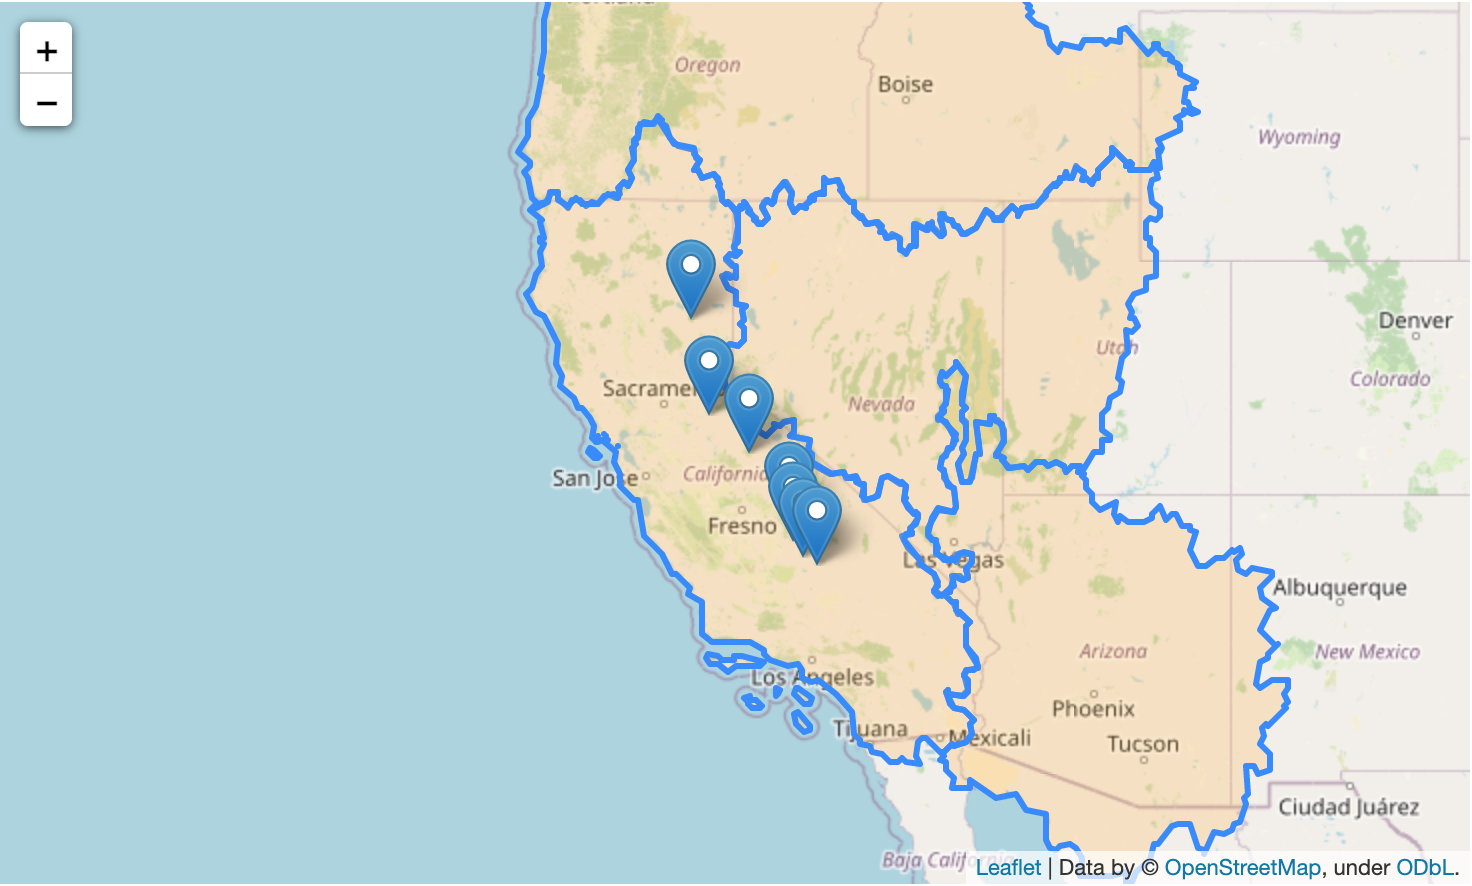

In [4]:
# There isn't a simple way to save folium maps as images, and the HTML versions don't render on Github.
# As a workaraound I screengrabbed them to save as images, and display the results here.
hu2 = plot_watersheds(2)
Image(os.path.join(IMG_DIR, "hu2.png"), width=700)
# hu2

HU4 - 16 watersheds


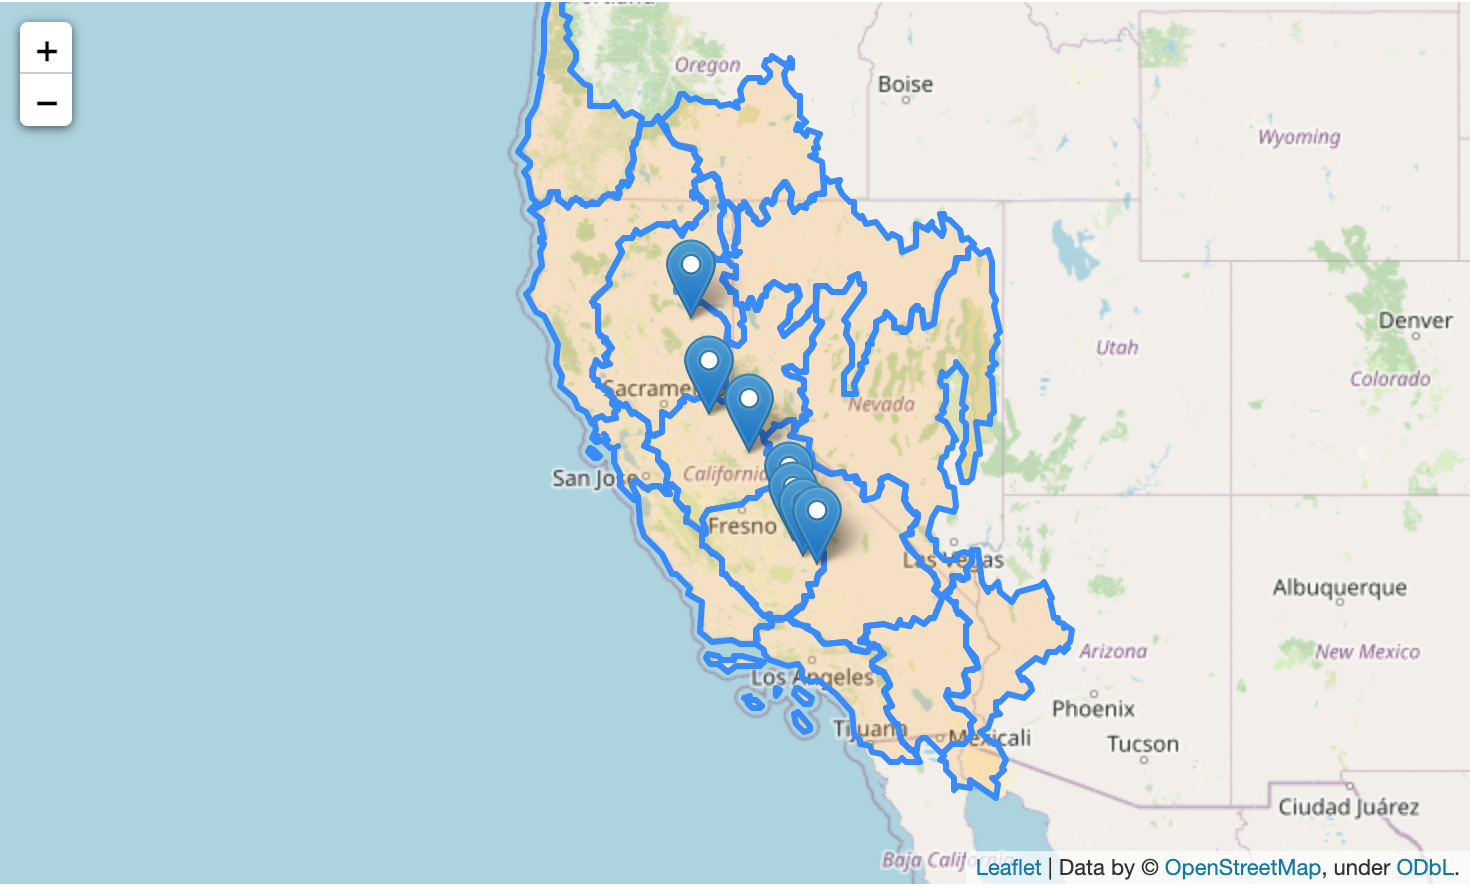

In [5]:
hu4 = plot_watersheds(4)
Image(os.path.join(IMG_DIR, "hu4.png"), width=700)
# hu4

HU6 - 24 watersheds


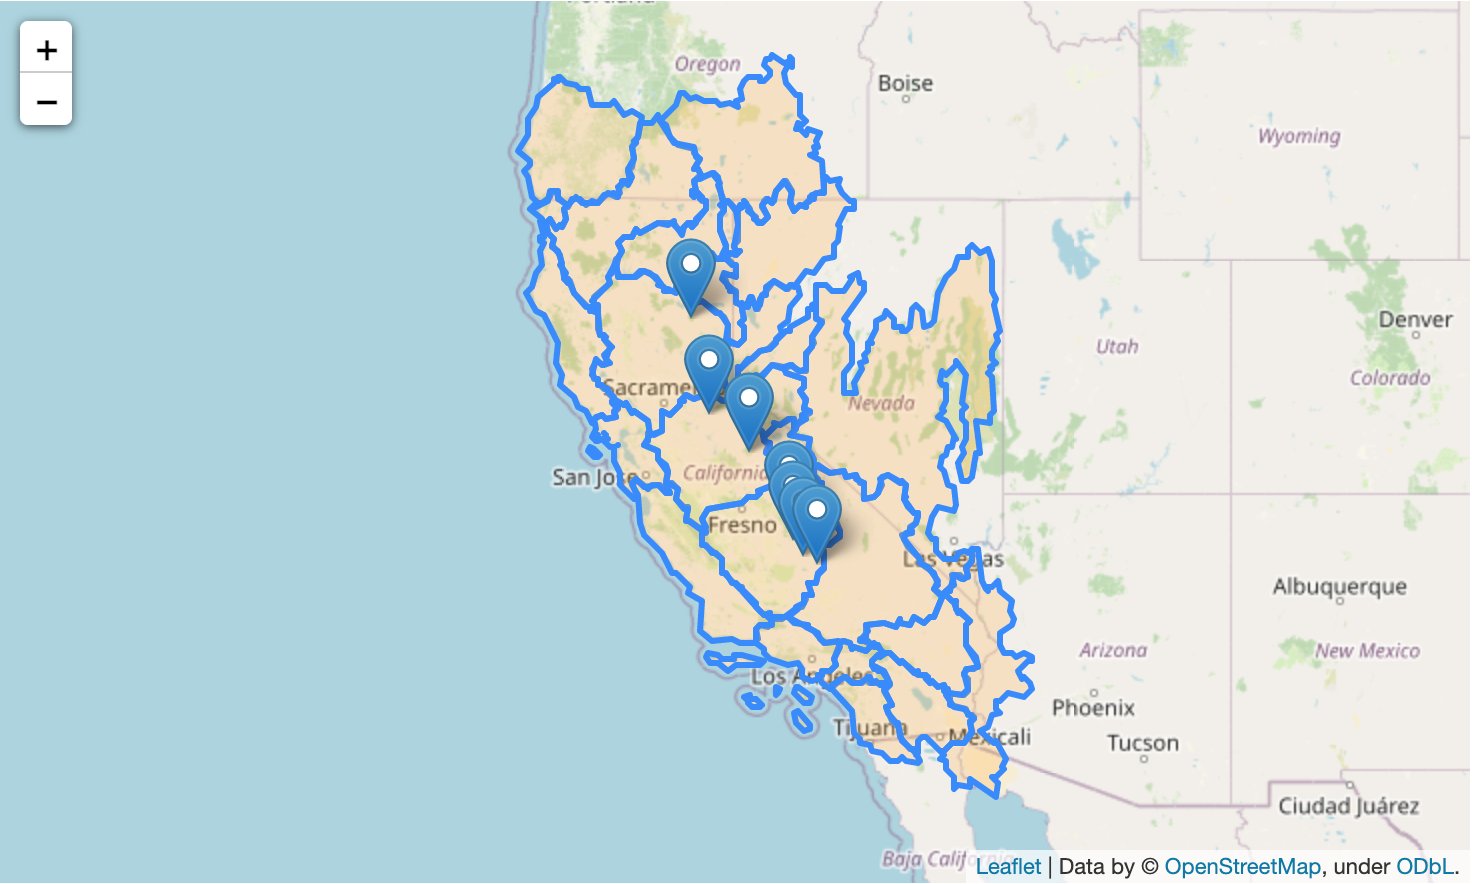

In [6]:
hu6 = plot_watersheds(6)
Image(os.path.join(IMG_DIR, "hu6.png"), width=700)
# hu6

HU8 - 140 watersheds


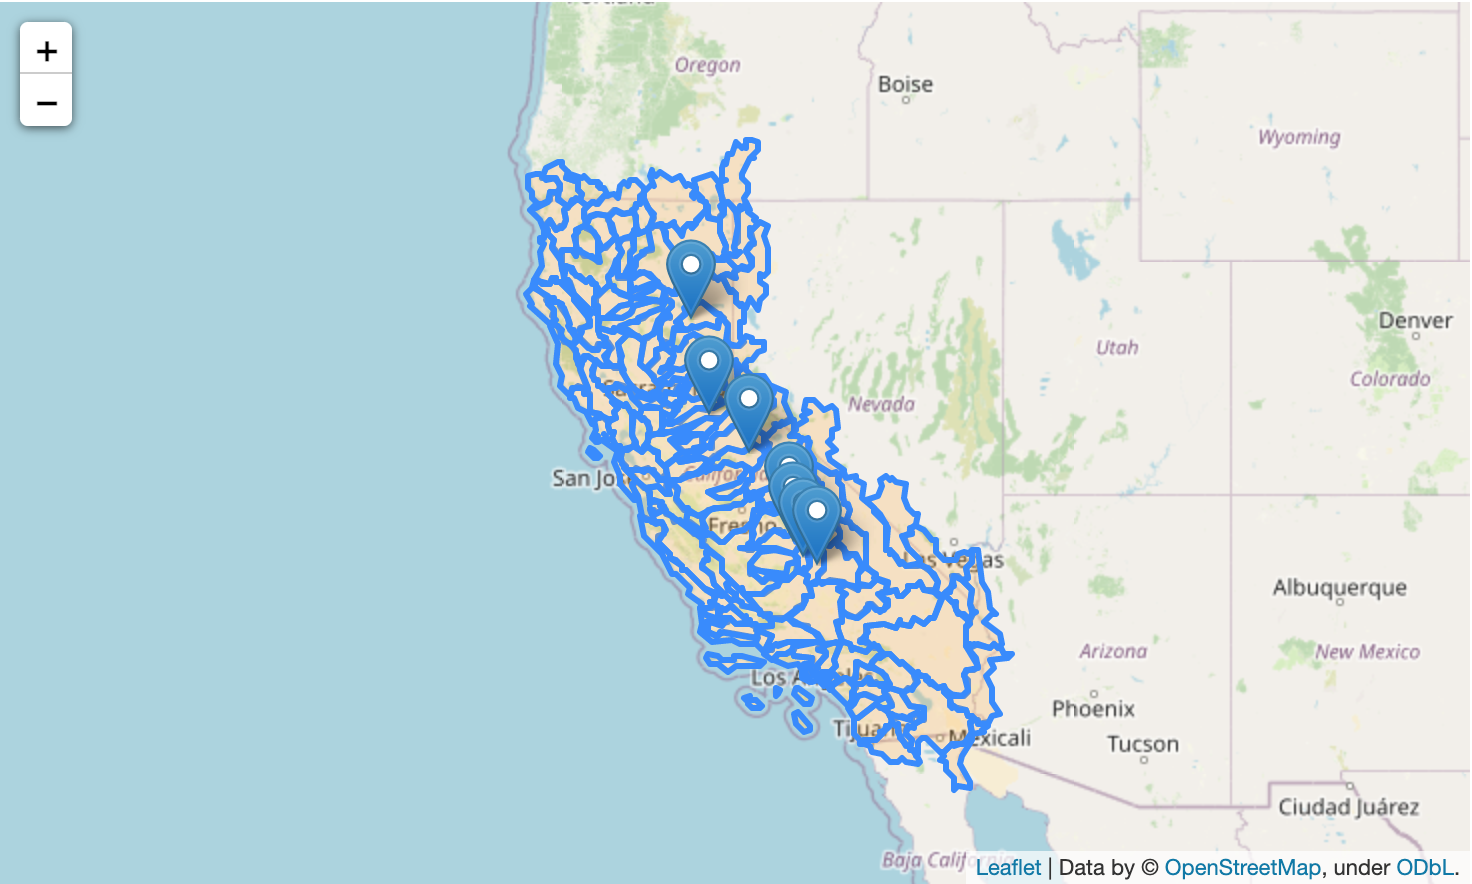

In [7]:
hu8 = plot_watersheds(8)
Image(os.path.join(IMG_DIR, "hu8.png"), width=700)
# hu8

HU10 - 1,128 watersheds


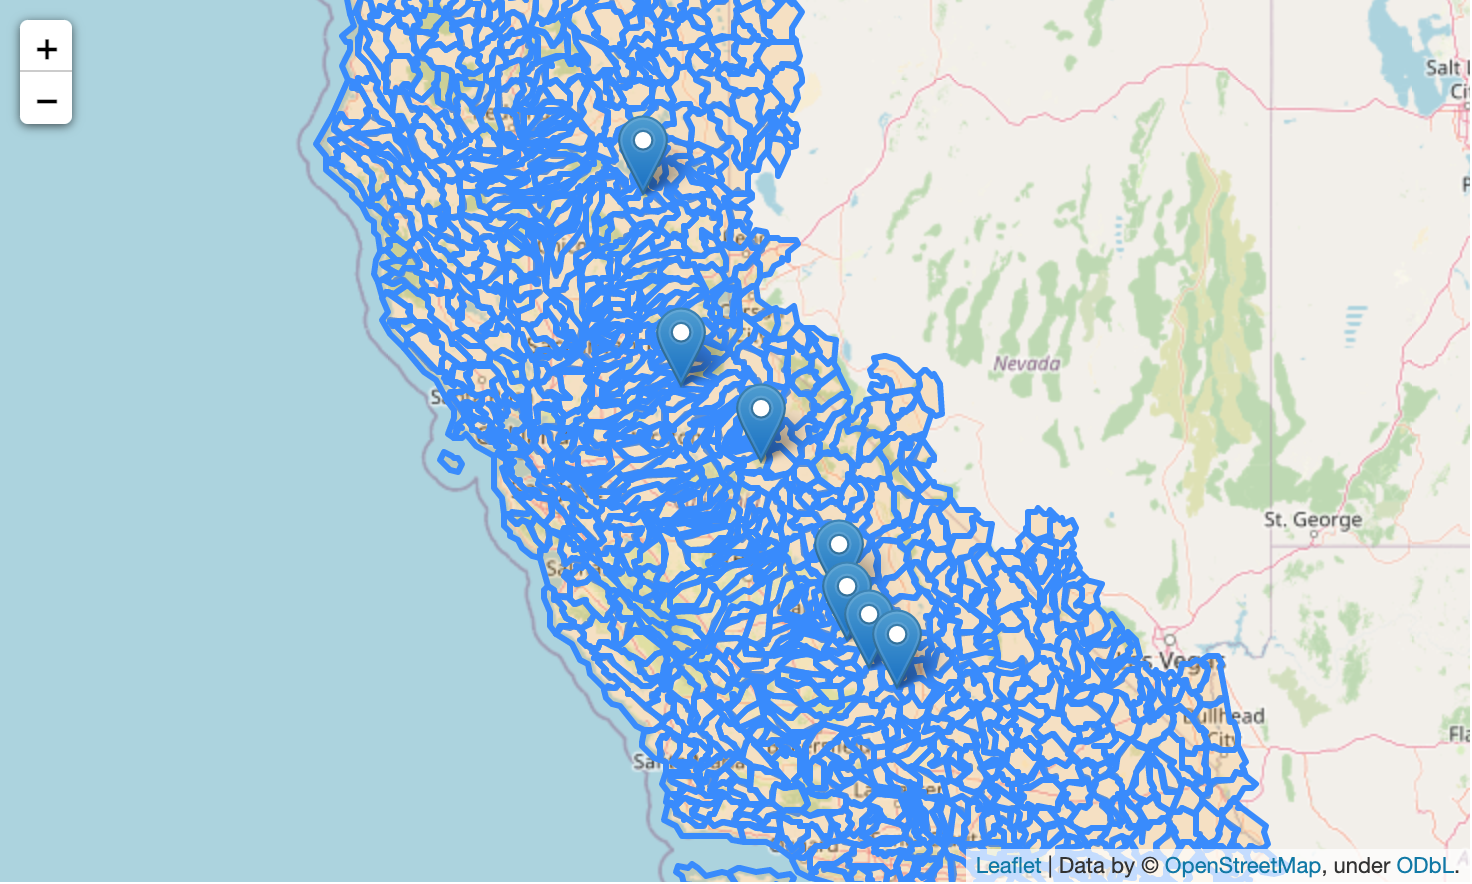

In [8]:
hu10 = plot_watersheds(10)
Image(os.path.join(IMG_DIR, "hu10.png"), width=700)
# hu10

In [9]:
# hu12 = plot_watersheds(12)

In [10]:
# hu14 = plot_watersheds(14)

In [11]:
# hu16 = plot_watersheds(16)